In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

## Utils

In [2]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap = 'gray')
        plt.axis('off')

In [3]:
def plot_image(image, nth, title, row = 1, cmap='gray'):
  plt.subplot(row, 5, nth)
  plt.imshow(image, cmap=cmap)
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

# Practice 6.1

## practice 6.1.1

In [4]:
def RGB_to_HSI(img):
  r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

  # Normalize the RGB values to the range [0, 1]
  r = r / 255.0
  g = g / 255.0
  b = b / 255.0

  # Calculate the intensity component
  i = (r + g + b) / 3

  # Calculate the hue and saturation components
  theta = np.arccos(0.5 * ((r - g) + (r - b)) / np.sqrt((r - g)**2 + (r - b) * (g - b)))
  h = np.where(b <= g, theta, 2 * np.pi - theta)
  s = 1 - 3 * np.minimum(np.minimum(r, g), b) / (r + g + b)

  # Combine the HSI channels into an HSI image
  # hsi = np.zeros(img.shape, dtype=np.float32)
  # hsi[..., 0] = h
  # hsi[..., 1] = s
  # hsi[..., 2] = i

  return [h, s, i]

In [5]:
# Load the Lena image
lena_image = cv2.imread("Lena.bmp")

# Convert the image to the HSI color space
h, s, i = RGB_to_HSI(lena_image)

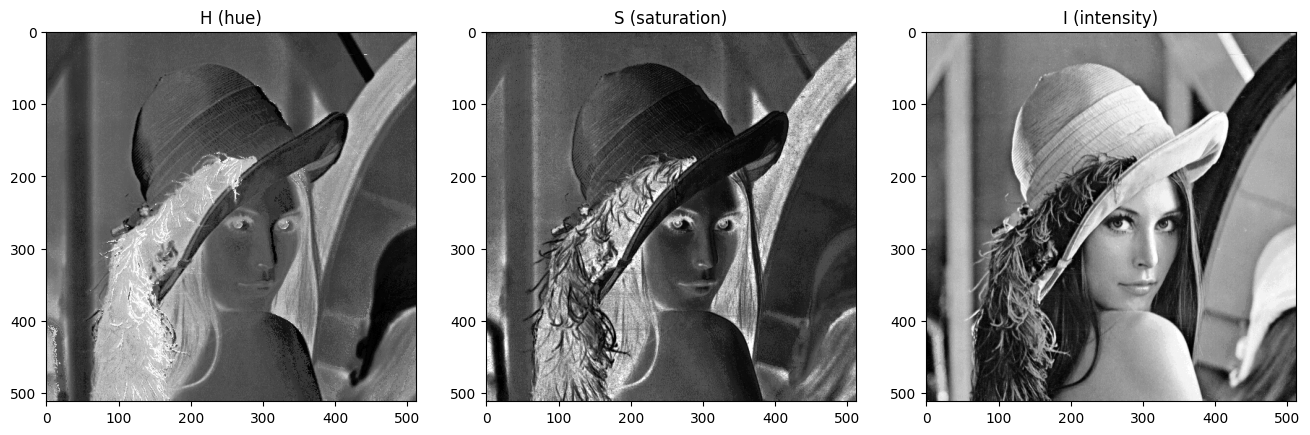

In [6]:
# Display the individual H, S, and I channels
plot_image(h, 1, "H (hue)")
plot_image(s, 2, "S (saturation)")
plot_image(i, 3, "I (intensity)")

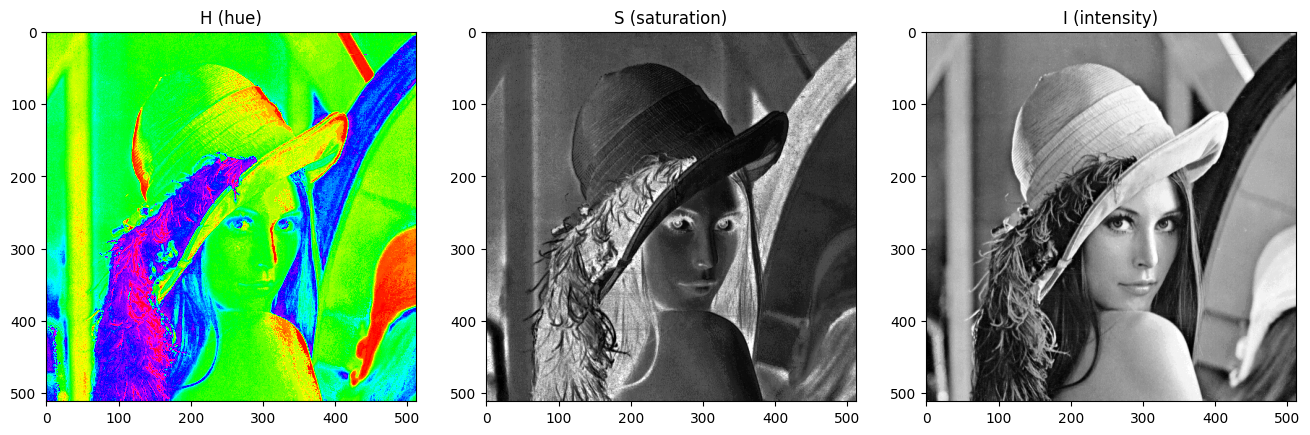

In [7]:
# Display the individual H, S, and I channels
plot_image(h, 1, "H (hue)",cmap = 'hsv')
plot_image(s, 2, "S (saturation)")
plot_image(i, 3, "I (intensity)")

In [8]:
cv2.imwrite('h.png', h * 255)
cv2.imwrite('s.png', s * 255)
cv2.imwrite('i.png', i * 255)

True

## practice 6.1.2

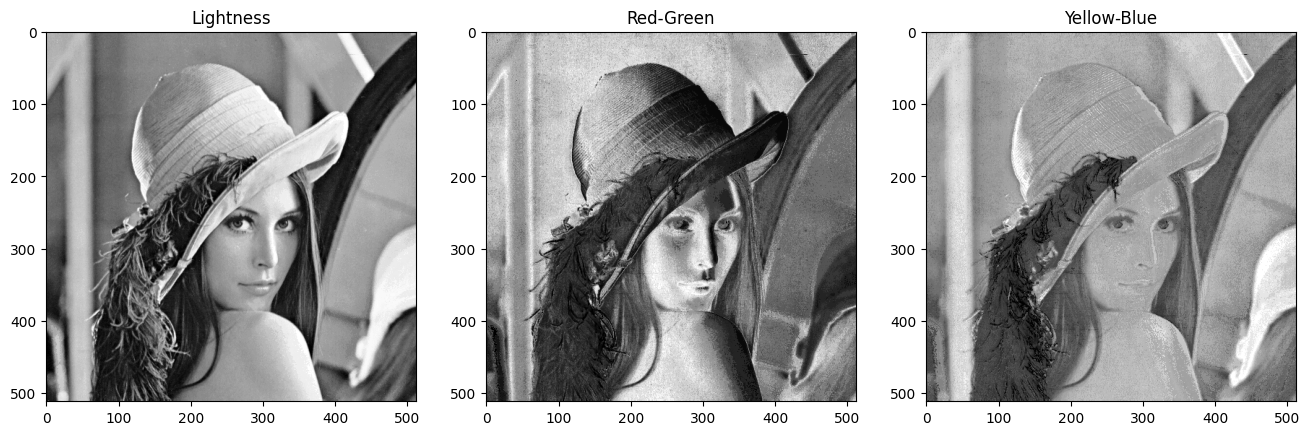

In [9]:
# Load an example image
lena_image = cv2.imread("Lena.bmp")

# Convert the image to LUV
img_luv = cv2.cvtColor(lena_image, cv2.COLOR_BGR2LUV)

# Split the image into its L, U, and V channels
l, u, v = cv2.split(img_luv)

# Display the L, U, and V channels
plot_image(l,1, title="Lightness")
plot_image(u,2, title="Red-Green")
plot_image(v,3, title="Yellow-Blue")


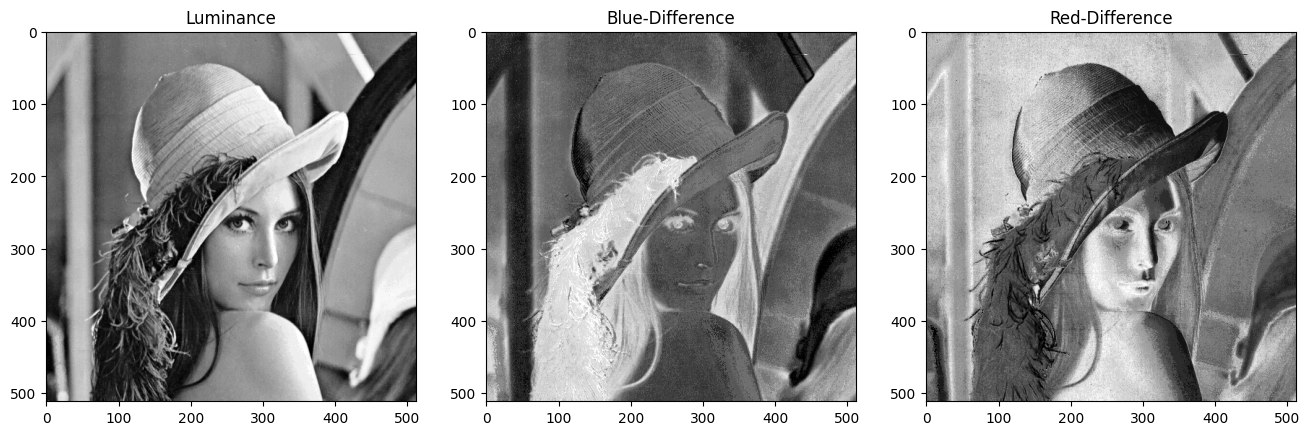

In [10]:
# Convert the image to YUV
img_yuv = cv2.cvtColor(lena_image, cv2.COLOR_BGR2YUV)

# Split the image into its Y, U, and V channels
y, u, v = cv2.split(img_yuv)

# Display the Y, U, and V channels
plot_image(y,1, title="Luminance")
plot_image(u,2, title="Blue-Difference")
plot_image(v,3, title="Red-Difference")


# Practice 6.2

## practice 6.2.1

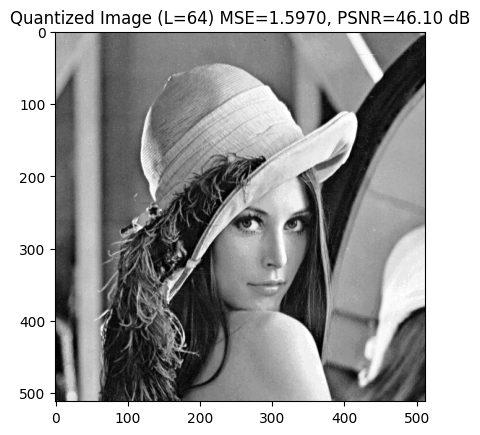

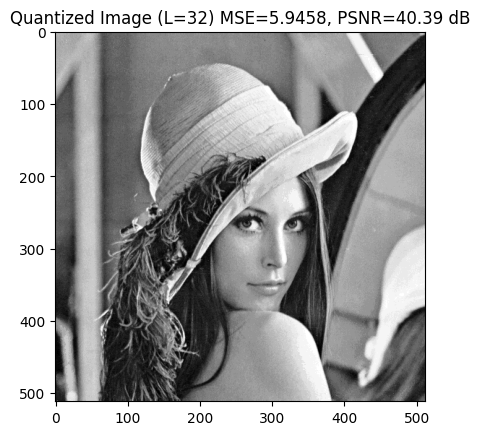

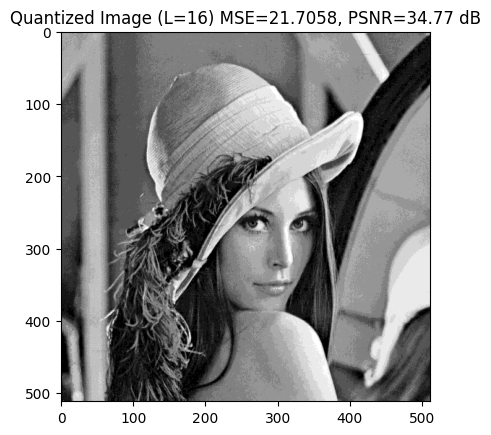

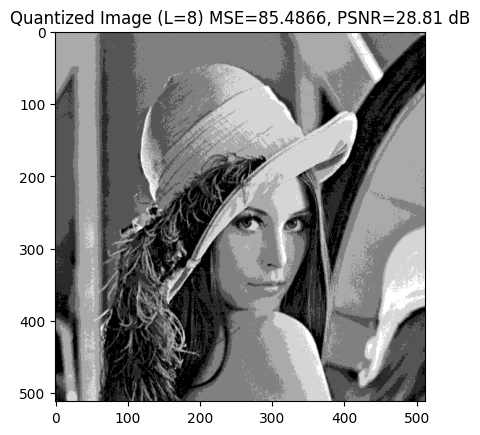

In [11]:
# Read grayscale image
lena_image = cv2.imread('Lena.bmp', cv2.IMREAD_GRAYSCALE)

# Number of levels of quantization
L_list = [64, 32, 16, 8]

index = 1
for L in L_list:
    index+=1
    # Quantization step size
    q = 256 / L

    # Quantize the image
    quantized = np.clip(np.round(lena_image / q), 0, L - 1) * q

    # Compute MSE and PSNR between original and quantized images
    mse = np.mean((lena_image - quantized) ** 2)
    psnr = 10 * math.log10(255 ** 2 / mse)

    # Display the quantized image using matplotlib
    plot_image(quantized, index, title=f'Quantized Image (L={L}) MSE={mse:.4f}, PSNR={psnr:.2f} dB')
    plt.show()

## practice 6.2.2

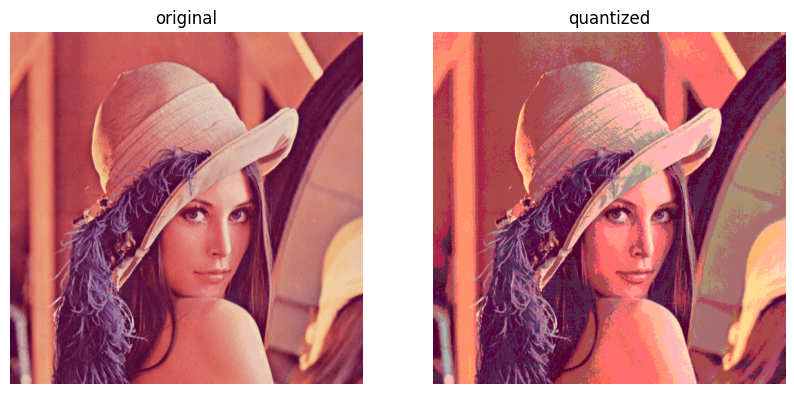

In [12]:
# Read the color image
lena_image = cv2.imread('Lena.bmp')

# Convert the image to float32 format
img = np.float32(lena_image) / 255.0

# Perform quantization on R, G, and B components
R_bits, G_bits, B_bits = 3, 3, 2
R_levels = 2 ** R_bits
G_levels = 2 ** G_bits
B_levels = 2 ** B_bits
img[:, :, 0] = np.round(img[:, :, 0] * (R_levels - 1)) / (R_levels - 1)
img[:, :, 1] = np.round(img[:, :, 1] * (G_levels - 1)) / (G_levels - 1)
img[:, :, 2] = np.round(img[:, :, 2] * (B_levels - 1)) / (B_levels - 1)

# Convert the image back to 8-bit unsigned integer format
img = np.uint8(img * 255.0)

# Display the original and quantized color image
imshow(lena_image, img, title=["original", "quantized"])


## practice 6.2.3

In [13]:
def redius_color(img, size):
  Z = img.reshape((-1,3))
  Z = np.float32(Z)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  ret,label,center=cv2.kmeans(Z,size,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  return res.reshape((img.shape))

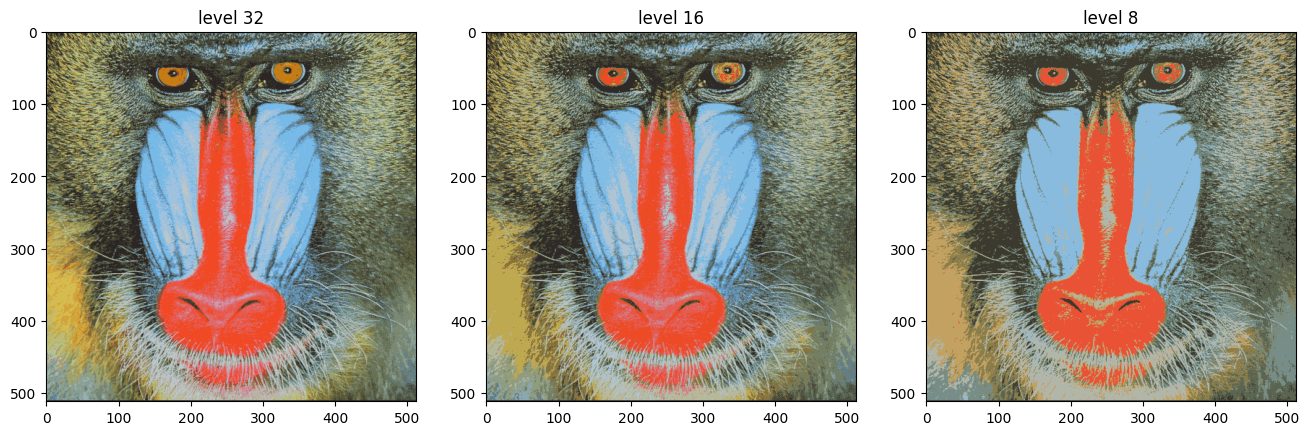

In [14]:
# Load the Baboon image
banoon_image = cv2.imread('Baboon.bmp')

# Convert the image from BGR to RGB
banoon_image = cv2.cvtColor(banoon_image, cv2.COLOR_BGR2RGB)

# Reduce the color of the image to 32 colors
img_32 = redius_color(banoon_image,32)

# Reduce the color of the image to 16 colors
img_16 = redius_color(banoon_image,16)

# Reduce the color of the image to 8 colors
img_8 = redius_color(banoon_image,8)

# Display the quantized images
plot_image(img_32,1,'level 32')
plot_image(img_16,2,'level 16')
plot_image(img_8,3,'level 8')
